In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from dateutil import tz
import statsmodels.api as sm
import seaborn as sns
import statsmodels.graphics.tsaplots as tsa

In [3]:
raw = pd.read_csv("all_data_hourly.csv")
raw

,name,slottime_GMT,slottype,slotavg,pointTitle
0,Campus.CW.TONS,5/1/21 4:00,H,2451.879750,Total Chilled Water
1,Campus.Elec.Demand_MW,5/1/21 4:00,H,21.180990,Total Campus Electric Demand
2,Campus.STM.Flow,5/1/21 4:00,H,147.684086,Total Steam Flow
3,CentralEnergyPlant.CW.ProcessCooler3inch.FP/TONS,5/1/21 4:00,H,15.075800,Process Cooler 3 inch Chilled Water
4,CentralEnergyPlant.CW.SampleCooler.FP/TONS,5/1/21 4:00,H,6.732450,Sample Cooler Chilled Water
...,...,...,...,...,...
130690,CentralEnergyPlant.CW.ProcessCooler3inch.FP/TONS,5/2/23 3:00,H,30.334750,Process Cooler 3 inch Chilled Water
130691,CentralEnergyPlant.CW.SampleCooler.FP/TONS,5/2/23 3:00,H,3.059270,Sample Cooler Chilled Water
130692,CentralEnergyPlant.GTG1-2.PROCESS.CW.FP/TONS,5/2/23 3:00,H,184.149750,GTG 1 and 2 Process Chilled Water
130693,CentralEnergyPlant.GTG1-2.TurbineIntakeAir.CW....,5/2/23 3:00,H,0.050382,GTG 1 and 2 Turbine Intake Air Chilled Water


In [4]:
raw["slottime_GMT"] = raw["slottime_GMT"].apply(lambda x: datetime.strptime(x, "%m/%d/%y %H:%M").replace(tzinfo=tz.tzutc()).astimezone(tz.tzlocal()))
raw

,name,slottime_GMT,slottype,slotavg,pointTitle
0,Campus.CW.TONS,2021-05-01 00:00:00-04:00,H,2451.879750,Total Chilled Water
1,Campus.Elec.Demand_MW,2021-05-01 00:00:00-04:00,H,21.180990,Total Campus Electric Demand
2,Campus.STM.Flow,2021-05-01 00:00:00-04:00,H,147.684086,Total Steam Flow
3,CentralEnergyPlant.CW.ProcessCooler3inch.FP/TONS,2021-05-01 00:00:00-04:00,H,15.075800,Process Cooler 3 inch Chilled Water
4,CentralEnergyPlant.CW.SampleCooler.FP/TONS,2021-05-01 00:00:00-04:00,H,6.732450,Sample Cooler Chilled Water
...,...,...,...,...,...
130690,CentralEnergyPlant.CW.ProcessCooler3inch.FP/TONS,2023-05-01 23:00:00-04:00,H,30.334750,Process Cooler 3 inch Chilled Water
130691,CentralEnergyPlant.CW.SampleCooler.FP/TONS,2023-05-01 23:00:00-04:00,H,3.059270,Sample Cooler Chilled Water
130692,CentralEnergyPlant.GTG1-2.PROCESS.CW.FP/TONS,2023-05-01 23:00:00-04:00,H,184.149750,GTG 1 and 2 Process Chilled Water
130693,CentralEnergyPlant.GTG1-2.TurbineIntakeAir.CW....,2023-05-01 23:00:00-04:00,H,0.050382,GTG 1 and 2 Turbine Intake Air Chilled Water


In [5]:
weather = pd.read_csv("weather_hourly.csv")
weather

,time,temperature_2m (°F),relativehumidity_2m (%),dewpoint_2m (°F),apparent_temperature (°F),pressure_msl (hPa),surface_pressure (hPa),precipitation (inch),rain (inch),snowfall (inch),...,cloudcover (%),cloudcover_low (%),cloudcover_mid (%),cloudcover_high (%),shortwave_radiation (W/m²),direct_radiation (W/m²),diffuse_radiation (W/m²),direct_normal_irradiance (W/m²),windspeed_10m (mp/h),windspeed_100m (mp/h)
0,2021-05-01T00:00,42.0,68,32.2,31.1,1008.0,973.4,0.000,0.000,0.000,...,77,50,53,1,35,16,19,133.5,16.8,27.8
1,2021-05-01T01:00,40.4,71,31.6,29.5,1009.3,974.5,0.004,0.004,0.000,...,100,63,64,17,0,0,0,0.0,16.5,27.3
2,2021-05-01T02:00,39.3,75,31.9,28.6,1010.2,975.3,0.008,0.008,0.000,...,100,61,97,90,0,0,0,0.0,16.2,26.9
3,2021-05-01T03:00,38.1,77,31.6,28.1,1011.1,976.1,0.008,0.008,0.000,...,100,94,100,74,0,0,0,0.0,14.6,24.3
4,2021-05-01T04:00,37.4,77,30.9,27.8,1011.7,976.6,0.008,0.004,0.028,...,100,99,98,50,0,0,0,0.0,13.2,22.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17539,2023-05-01T19:00,53.2,60,39.7,45.1,989.4,956.2,0.016,0.016,0.000,...,56,32,18,54,522,257,265,314.4,13.4,20.5
17540,2023-05-01T20:00,49.9,63,37.8,42.0,989.7,956.2,0.024,0.024,0.000,...,44,9,31,57,496,264,232,326.5,12.1,18.2
17541,2023-05-01T21:00,49.3,68,39.2,42.1,990.4,956.9,0.008,0.008,0.000,...,44,18,25,41,448,263,185,387.8,11.0,16.8
17542,2023-05-01T22:00,50.2,63,37.9,44.3,991.0,957.5,0.004,0.004,0.000,...,81,24,66,67,357,237,120,484.1,7.2,12.0


In [6]:
weather["time"] = weather["time"].apply(lambda x: datetime.strptime(x, "%Y-%m-%dT%H:%M").replace(tzinfo=tz.tzutc()).astimezone(tz.tzlocal()))
weather = weather.set_index("time")
weather

,temperature_2m (°F),relativehumidity_2m (%),dewpoint_2m (°F),apparent_temperature (°F),pressure_msl (hPa),surface_pressure (hPa),precipitation (inch),rain (inch),snowfall (inch),weathercode (wmo code),cloudcover (%),cloudcover_low (%),cloudcover_mid (%),cloudcover_high (%),shortwave_radiation (W/m²),direct_radiation (W/m²),diffuse_radiation (W/m²),direct_normal_irradiance (W/m²),windspeed_10m (mp/h),windspeed_100m (mp/h)
time,,,,,,,,,,,,,,,,,,,,
2021-04-30 20:00:00-04:00,42.0,68,32.2,31.1,1008.0,973.4,0.000,0.000,0.000,2,77,50,53,1,35,16,19,133.5,16.8,27.8
2021-04-30 21:00:00-04:00,40.4,71,31.6,29.5,1009.3,974.5,0.004,0.004,0.000,51,100,63,64,17,0,0,0,0.0,16.5,27.3
2021-04-30 22:00:00-04:00,39.3,75,31.9,28.6,1010.2,975.3,0.008,0.008,0.000,51,100,61,97,90,0,0,0,0.0,16.2,26.9
2021-04-30 23:00:00-04:00,38.1,77,31.6,28.1,1011.1,976.1,0.008,0.008,0.000,51,100,94,100,74,0,0,0,0.0,14.6,24.3
2021-05-01 00:00:00-04:00,37.4,77,30.9,27.8,1011.7,976.6,0.008,0.004,0.028,71,100,99,98,50,0,0,0,0.0,13.2,22.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-01 15:00:00-04:00,53.2,60,39.7,45.1,989.4,956.2,0.016,0.016,0.000,51,56,32,18,54,522,257,265,314.4,13.4,20.5
2023-05-01 16:00:00-04:00,49.9,63,37.8,42.0,989.7,956.2,0.024,0.024,0.000,53,44,9,31,57,496,264,232,326.5,12.1,18.2
2023-05-01 17:00:00-04:00,49.3,68,39.2,42.1,990.4,956.9,0.008,0.008,0.000,51,44,18,25,41,448,263,185,387.8,11.0,16.8


In [7]:
chilled_water = raw[["slottime_GMT", "slotavg"]][raw["pointTitle"] == "Total Chilled Water"]
chilled_water.columns = ["time", "chilled_water"]
chilled_water = chilled_water.set_index("time")
display(chilled_water)

steam = raw[["slottime_GMT", "slotavg"]][raw["pointTitle"] == "Total Steam Flow"]
steam.columns = ["time", "steam"]
steam = steam.set_index("time")
display(steam)

electricity = raw[["slottime_GMT", "slotavg"]][raw["pointTitle"] == "Total Campus Electric Demand"]
electricity.columns = ["time", "electricity"]
electricity = electricity.set_index("time")
display(electricity)

# data = pd.concat([chilled_water, steam, electricity], axis=1, join="inner")
# display(data)

,chilled_water
time,
2021-05-01 00:00:00-04:00,2451.87975
2021-05-01 01:00:00-04:00,2385.74125
2021-05-01 02:00:00-04:00,2314.83125
2021-05-01 03:00:00-04:00,2319.18375
2021-05-01 04:00:00-04:00,2361.69675
...,...
2023-05-01 19:00:00-04:00,2980.17150
2023-05-01 20:00:00-04:00,2830.65875
2023-05-01 21:00:00-04:00,2796.19950


,steam
time,
2021-05-01 00:00:00-04:00,147.684086
2021-05-01 01:00:00-04:00,147.614200
2021-05-01 02:00:00-04:00,151.649156
2021-05-01 03:00:00-04:00,147.774962
2021-05-01 04:00:00-04:00,150.348843
...,...
2023-05-01 19:00:00-04:00,123.162225
2023-05-01 20:00:00-04:00,128.566650
2023-05-01 21:00:00-04:00,126.427325


,electricity
time,
2021-05-01 00:00:00-04:00,21.180990
2021-05-01 01:00:00-04:00,21.046370
2021-05-01 02:00:00-04:00,20.794573
2021-05-01 03:00:00-04:00,20.755208
2021-05-01 04:00:00-04:00,20.699110
...,...
2023-05-01 19:00:00-04:00,25.738350
2023-05-01 20:00:00-04:00,25.189815
2023-05-01 21:00:00-04:00,24.451785


In [8]:
df = weather.join([chilled_water, steam, electricity], how="inner").reset_index()
df

,time,temperature_2m (°F),relativehumidity_2m (%),dewpoint_2m (°F),apparent_temperature (°F),pressure_msl (hPa),surface_pressure (hPa),precipitation (inch),rain (inch),snowfall (inch),...,cloudcover_high (%),shortwave_radiation (W/m²),direct_radiation (W/m²),diffuse_radiation (W/m²),direct_normal_irradiance (W/m²),windspeed_10m (mp/h),windspeed_100m (mp/h),chilled_water,steam,electricity
0,2021-05-01 00:00:00-04:00,37.4,77,30.9,27.8,1011.7,976.6,0.008,0.004,0.028,...,50,0,0,0,0.0,13.2,22.9,2451.87975,147.684086,21.180990
1,2021-05-01 01:00:00-04:00,37.0,76,30.1,27.4,1012.5,977.4,0.004,0.000,0.028,...,8,0,0,0,0.0,13.0,25.2,2385.74125,147.614200,21.046370
2,2021-05-01 02:00:00-04:00,37.0,74,29.6,26.7,1013.3,978.2,0.000,0.000,0.000,...,0,0,0,0,0.0,14.6,25.6,2314.83125,151.649156,20.794573
3,2021-05-01 03:00:00-04:00,36.4,85,32.3,27.5,1014.0,978.8,0.000,0.000,0.000,...,0,0,0,0,0.0,12.2,20.8,2319.18375,147.774962,20.755208
4,2021-05-01 04:00:00-04:00,36.8,83,32.0,28.3,1014.9,979.7,0.000,0.000,0.000,...,0,0,0,0,0.0,10.9,19.5,2361.69675,150.348843,20.699110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17406,2023-05-01 15:00:00-04:00,53.2,60,39.7,45.1,989.4,956.2,0.016,0.016,0.000,...,54,522,257,265,314.4,13.4,20.5,3289.04225,106.263123,27.715608
17407,2023-05-01 16:00:00-04:00,49.9,63,37.8,42.0,989.7,956.2,0.024,0.024,0.000,...,57,496,264,232,326.5,12.1,18.2,3060.91725,124.254375,28.095195
17408,2023-05-01 17:00:00-04:00,49.3,68,39.2,42.1,990.4,956.9,0.008,0.008,0.000,...,41,448,263,185,387.8,11.0,16.8,3036.43975,108.202820,26.360442
17409,2023-05-01 18:00:00-04:00,50.2,63,37.9,44.3,991.0,957.5,0.004,0.004,0.000,...,67,357,237,120,484.1,7.2,12.0,3170.22075,111.019855,26.238255


In [9]:
# df["hour"] = df["time"].apply(lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S").replace(tzinfo=tz.tzutc()).astimezone(tz.tzlocal()).hour)
# df["time"] = df["time"].apply(lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S").replace(tzinfo=tz.tzutc()).astimezone(tz.tzlocal()))
df = df[(df["chilled_water"] > 0) & (df["steam"] > 0) & (df["electricity"] > 0)]
df = df.dropna()
display(df)

,time,temperature_2m (°F),relativehumidity_2m (%),dewpoint_2m (°F),apparent_temperature (°F),pressure_msl (hPa),surface_pressure (hPa),precipitation (inch),rain (inch),snowfall (inch),...,cloudcover_high (%),shortwave_radiation (W/m²),direct_radiation (W/m²),diffuse_radiation (W/m²),direct_normal_irradiance (W/m²),windspeed_10m (mp/h),windspeed_100m (mp/h),chilled_water,steam,electricity
0,2021-05-01 00:00:00-04:00,37.4,77,30.9,27.8,1011.7,976.6,0.008,0.004,0.028,...,50,0,0,0,0.0,13.2,22.9,2451.87975,147.684086,21.180990
1,2021-05-01 01:00:00-04:00,37.0,76,30.1,27.4,1012.5,977.4,0.004,0.000,0.028,...,8,0,0,0,0.0,13.0,25.2,2385.74125,147.614200,21.046370
2,2021-05-01 02:00:00-04:00,37.0,74,29.6,26.7,1013.3,978.2,0.000,0.000,0.000,...,0,0,0,0,0.0,14.6,25.6,2314.83125,151.649156,20.794573
3,2021-05-01 03:00:00-04:00,36.4,85,32.3,27.5,1014.0,978.8,0.000,0.000,0.000,...,0,0,0,0,0.0,12.2,20.8,2319.18375,147.774962,20.755208
4,2021-05-01 04:00:00-04:00,36.8,83,32.0,28.3,1014.9,979.7,0.000,0.000,0.000,...,0,0,0,0,0.0,10.9,19.5,2361.69675,150.348843,20.699110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17406,2023-05-01 15:00:00-04:00,53.2,60,39.7,45.1,989.4,956.2,0.016,0.016,0.000,...,54,522,257,265,314.4,13.4,20.5,3289.04225,106.263123,27.715608
17407,2023-05-01 16:00:00-04:00,49.9,63,37.8,42.0,989.7,956.2,0.024,0.024,0.000,...,57,496,264,232,326.5,12.1,18.2,3060.91725,124.254375,28.095195
17408,2023-05-01 17:00:00-04:00,49.3,68,39.2,42.1,990.4,956.9,0.008,0.008,0.000,...,41,448,263,185,387.8,11.0,16.8,3036.43975,108.202820,26.360442
17409,2023-05-01 18:00:00-04:00,50.2,63,37.9,44.3,991.0,957.5,0.004,0.004,0.000,...,67,357,237,120,484.1,7.2,12.0,3170.22075,111.019855,26.238255


TypeError: float() argument must be a string or a number, not 'Timestamp'

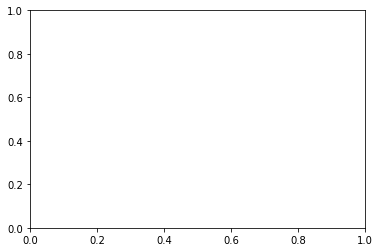

In [10]:
plt.plot(df["time"], df["chilled_water"])
plt.title("Avg Campus Chilled Water Usage v.s. Time")
plt.xlabel("Time")
plt.ylabel("Chilled Water (tons)")

Text(0, 0.5, 'Steam (Klbs/hr)')

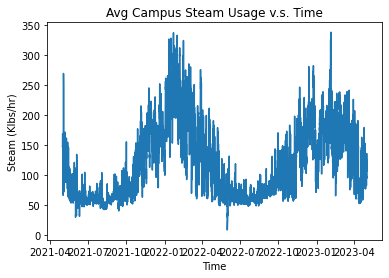

In [ ]:
plt.plot(df["time"], df["steam"])
plt.title("Avg Campus Steam Usage v.s. Time")
plt.xlabel("Time")
plt.ylabel("Steam (Klbs/hr)")

Text(0, 0.5, 'Electricity (MW)')

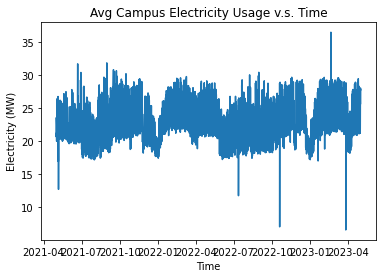

In [ ]:
plt.plot(df["time"], df["electricity"])
plt.title("Avg Campus Electricity Usage v.s. Time")
plt.xlabel("Time")
plt.ylabel("Electricity (MW)")

0        3043.108519
1        2958.539188
2        2958.539188
3        2831.685191
4        2916.254522
            ...     
17406    6383.597108
17407    5685.900124
17408    5559.046127
17409    5749.327123
17410    5622.473126
Length: 17353, dtype: float64


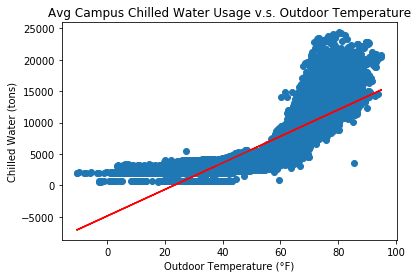

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          chilled_water   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                 3.892e+04
Date:                Sun, 14 May 2023   Prob (F-statistic):               0.00
Time:                        21:54:13   Log-Likelihood:            -1.6121e+05
No. Observations:               17353   AIC:                         3.224e+05
Df Residuals:                   17351   BIC:                         3.224e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -4864.1240     58.899    -82.583      0.000   -4979.573   -4748.675
temperature_2m (°F)   211.4233      1.072    197.293      0.000     209.323     213.524
==============================================================================
Omnibus:                     2690.037   Durbin-Watson:                   0.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4457.084
Skew:                           1.044   Prob(JB):                         0.00
Kurtosis:                       4.344   Cond. No.                         163.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
X = df["temperature_2m (°F)"]
Y = df["chilled_water"]

X = sm.add_constant(X)
model_q1 = sm.OLS(Y, X).fit()
predictions = model_q1.predict(X)
print(predictions)

plt.scatter(X["temperature_2m (°F)"], Y)
plt.plot(X["temperature_2m (°F)"], predictions, c="red")
plt.title("Avg Campus Chilled Water Usage v.s. Outdoor Temperature")
plt.xlabel("Outdoor Temperature (°F)")
plt.ylabel("Chilled Water (tons)")
plt.show()

model_q1.summary()

,const,temperature_2m (°F),temperature_2m^2 (°F)
0,1.0,37.4,1398.76
1,1.0,37.0,1369.00
2,1.0,37.0,1369.00
3,1.0,36.4,1324.96
4,1.0,36.8,1354.24
...,...,...,...
17406,1.0,53.2,2830.24
17407,1.0,49.9,2490.01
17408,1.0,49.3,2430.49
17409,1.0,50.2,2520.04


0        2175.995433
1        2142.077220
2        2142.077220
3        2094.096071
4        2125.697348
            ...     
17406    4751.270811
17407    4014.285177
17408    3891.582851
17409    4076.939617
17410    3952.499588
Length: 17353, dtype: float64


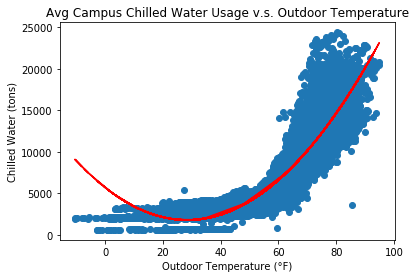

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          chilled_water   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                 4.650e+04
Date:                Sun, 14 May 2023   Prob (F-statistic):               0.00
Time:                        21:54:16   Log-Likelihood:            -1.5536e+05
No. Observations:               17353   AIC:                         3.107e+05
Df Residuals:                   17350   BIC:                         3.108e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  5684.1751     91.887     61.860      0.000    5504.067    5864.283
temperature_2m (°F)    -274.3295      3.839    -71.457      0.000    -281.855    -266.804
temperature_2m^2 (°F)     4.8269      0.037    129.119      0.000       4.754       4.900
==============================================================================
Omnibus:                     3810.157   Durbin-Watson:                   0.097
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16310.169
Skew:                           1.022   Prob(JB):                         0.00
Kurtosis:                       7.287   Cond. No.                     2.31e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.31e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
X = pd.DataFrame(X)
X["temperature_2m^2 (°F)"] = np.power(df["temperature_2m (°F)"], 2)
display(X)

model_q1 = sm.OLS(Y, X).fit()
predictions = model_q1.predict(X)
print(predictions)

plt.scatter(X["temperature_2m (°F)"], Y)
plt.plot(X["temperature_2m (°F)"], predictions, c="red")
plt.title("Avg Campus Chilled Water Usage v.s. Outdoor Temperature")
plt.xlabel("Outdoor Temperature (°F)")
plt.ylabel("Chilled Water (tons)")
plt.show()

model_q1.summary()

,const,temperature_2m (°F),temperature_2m^2 (°F),temperature_2m^3 (°F)
0,1.0,37.4,1398.76,52313.624
1,1.0,37.0,1369.00,50653.000
2,1.0,37.0,1369.00,50653.000
3,1.0,36.4,1324.96,48228.544
4,1.0,36.8,1354.24,49836.032
...,...,...,...,...
17406,1.0,53.2,2830.24,150568.768
17407,1.0,49.9,2490.01,124251.499
17408,1.0,49.3,2430.49,119823.157
17409,1.0,50.2,2520.04,126506.008


0        2385.416678
1        2357.516887
2        2357.516887
3        2317.979847
4        2344.031015
            ...     
17406    4607.921921
17407    3946.587880
17408    3838.395550
17409    4002.049235
17410    3892.038333
Length: 17353, dtype: float64


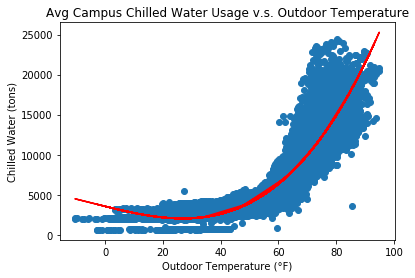

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          chilled_water   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                 3.199e+04
Date:                Sun, 14 May 2023   Prob (F-statistic):               0.00
Time:                        22:02:19   Log-Likelihood:            -1.5513e+05
No. Observations:               17353   AIC:                         3.103e+05
Df Residuals:                   17349   BIC:                         3.103e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  3542.1863    134.185     26.398      0.000    3279.171    3805.202
temperature_2m (°F)     -89.6112      9.333     -9.601      0.000    -107.906     -71.317
temperature_2m^2 (°F)     0.4045      0.208      1.949      0.051      -0.002       0.811
temperature_2m^3 (°F)     0.0311      0.001     21.655      0.000       0.028       0.034
==============================================================================
Omnibus:                     4202.744   Durbin-Watson:                   0.106
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            22777.359
Skew:                           1.059   Prob(JB):                         0.00
Kurtosis:                       8.197   Cond. No.                     2.42e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.42e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
X["temperature_2m^3 (°F)"] = np.power(df["temperature_2m (°F)"], 3)
display(X)

model_q1 = sm.OLS(Y, X).fit()
predictions = model_q1.predict(X)
print(predictions)

plt.scatter(X["temperature_2m (°F)"], Y)
plt.plot(X["temperature_2m (°F)"], predictions, c="red")
plt.title("Avg Campus Chilled Water Usage v.s. Outdoor Temperature")
plt.xlabel("Outdoor Temperature (°F)")
plt.ylabel("Chilled Water (tons)")
plt.show()

model_q1.summary()

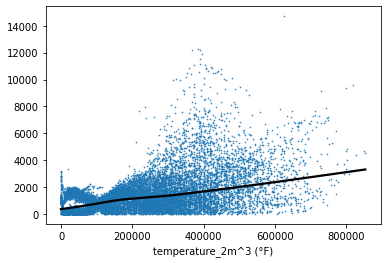

In [37]:
# checking assumptions-- constant variance
x_cubed = X["temperature_2m^3 (°F)"]

sns.regplot(x_cubed, abs(model_q1.resid), lowess=True, line_kws = {'color': 'black'}, scatter_kws = {'s': 0.5})

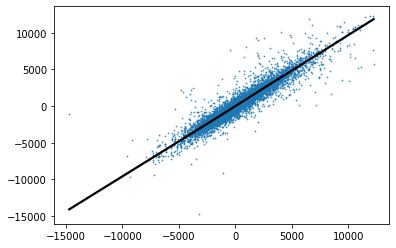

In [38]:
# checking assumptions -- errors are independent
sns.regplot(model_q1.resid[: -1], model_q1.resid[1:], lowess = True, line_kws = {'color': 'black'} , scatter_kws = { 's' : 0.5})

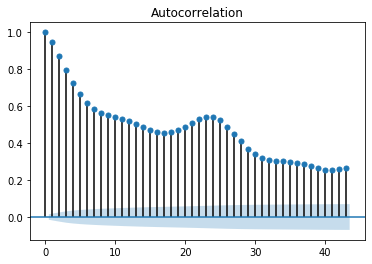

In [39]:
# checking assumptions -- autocorrelation plots

tsa.plot_acf(model_q1.resid)
plt.show()